# Ethoscopy - Circadian tutorial

This tutorial assumes you have some basic knowledge of Ethoscopy, if you don't please head to the overview tutorial first.

This tutorial will walk through the array of circadian analysis methods ethoscopy contains, from actograms and anticipation scores, to periodograms. Whilst the tutorial will keep things basic there will be some assumed knowlege about circadian rythmn.

## 1. Load the dummy dataset

In [1]:
import ethoscopy as etho

In [2]:
# This tutorial required version 1.2.0 or greater
etho.__version__

'2.0.dev0'

In [3]:
# import this function to get the tutorial dataset
from ethoscopy.misc.get_tutorials import get_tutorial

In [4]:
# We'll be using a circadian specific dataset this time that was generated previously, enter 'circadian' as the argument to grab it
# Load the data and metadata, and then intialise it into a behavpy object
data, metadata = get_tutorial('circadian')
df = etho.behavpy(data, metadata, palette = 'Set2', canvas = 'seaborn', check = True)
dfp = etho.behavpy(data, metadata, palette = 'Set2', canvas = 'plotly', check = True)

## 2. Looking at the data

In [5]:
# Lets have a look at what we're working with
df.summary()

behavpy table with: 
    individuals       32
   metavariable        3
      variables        2
   measurements   415040


In [6]:
# In the meta we can see the specimens are split into different experimental groups, these are the groups we will want to look at
df.meta

date  region_id period_group
id                                                                      
2017-01-16 08:00:00|circadian.txt|01  17/01/2017          1         long
2017-01-16 08:00:00|circadian.txt|02  17/01/2017          2         long
2017-01-16 08:00:00|circadian.txt|03  17/01/2017          3         long
2017-01-16 08:00:00|circadian.txt|04  17/01/2017          4         long
2017-01-16 08:00:00|circadian.txt|05  17/01/2017          5         long
2017-01-16 08:00:00|circadian.txt|06  17/01/2017          6         long
2017-01-16 08:00:00|circadian.txt|07  17/01/2017          7         long
2017-01-16 08:00:00|circadian.txt|08  17/01/2017          8         long
2017-01-16 08:00:00|circadian.txt|09  17/01/2017          9         long
2017-01-16 08:00:00|circadian.txt|10  17/01/2017         10         long
2017-01-16 08:00:00|circadian.txt|11  17/01/2017         11        short
2017-01-16 08:00:00|circadian.txt|12  17/01/2017         12        short
2017-01-16 08:00:00|circadian.txt|13  17/01/2017         13        short
2017-01-16 08:00:00|circadian.txt|14  17/01/2017         14        short
2017-01-16 08:00:00|circadian.txt|15  17/01/2017         15        short
2017-01-16 08:00:00|circadian.txt|16  17/01/2017         16        short
2017-01-16 08:00:00|circadian.txt|17  17/01/2017         17        short
2017-01-16 08:00:00|circadian.txt|18  17/01/2017         18        short
2017-01-16 08:00:00|circadian.txt|19  17/01/2017         19        short
2017-01-16 08:00:00|circadian.txt|20  17/01/2017         20        short
2017-01-16 08:00:00|circadian.txt|21  17/01/2017         21        short
2017-01-16 08:00:00|circadian.txt|22  17/01/2017         22           wt
2017-01-16 08:00:00|circadian.txt|23  17/01/2017         23           wt
2017-01-16 08:00:00|circadian.txt|24  17/01/2017         24           wt
2017-01-16 08:00:00|circadian.txt|25  17/01/2017         25           wt
2017-01-16 08:00:00|circadian.txt|26  17/01/2017         26           wt
2017-01-16 08:00:00|circadian.txt|27  17/01/2017         27           wt
2017-01-16 08:00:00|circadian.txt|28  17/01/2017         28           wt
2017-01-16 08:00:00|circadian.txt|29  17/01/2017         29           wt
2017-01-16 08:00:00|circadian.txt|30  17/01/2017         30           wt
2017-01-16 08:00:00|circadian.txt|31  17/01/2017         31           wt
2017-01-16 08:00:00|circadian.txt|32  17/01/2017         32           wt

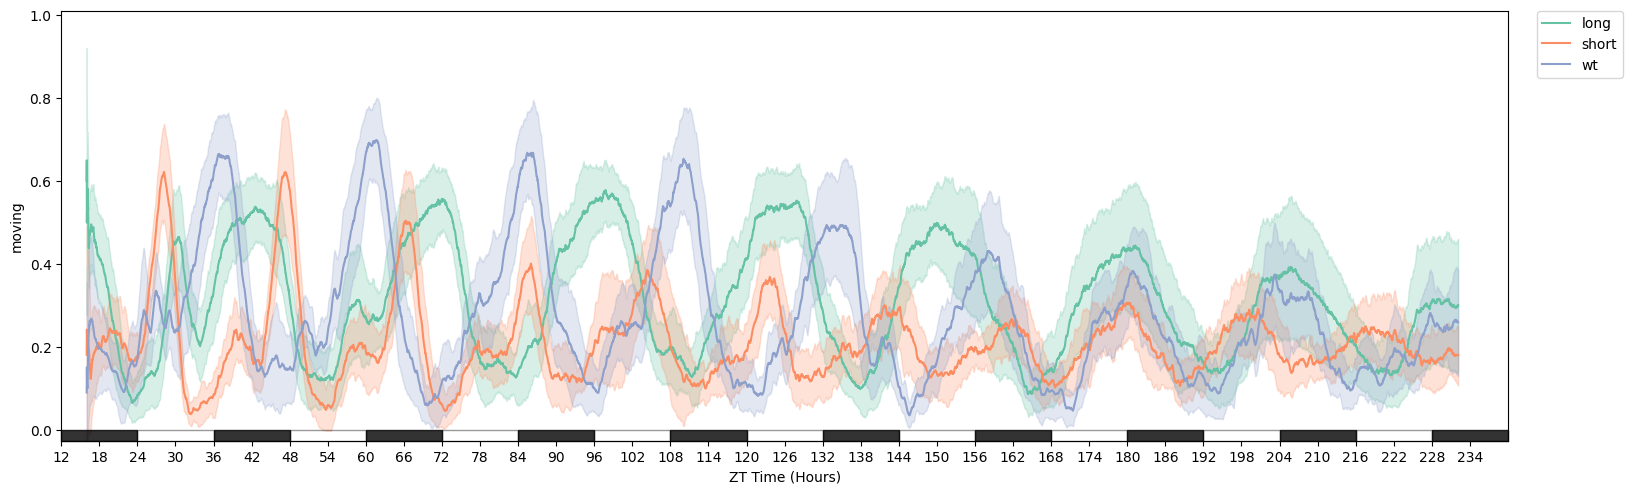

In [7]:
# We can see from plotting the movement data that they a different rythmn
fig = df.plot_overtime('moving', facet_col = 'period_group', avg_window=180)

## 3. Actograms

Actograms are a simple visual way to see changes in activity over multiple days. With ethoscopy you have two ways of viewing your actograms, you can create one for every specimen or you can average it over the whole dataframe / experimental group.

Due to the interactive nature of Plotly plot objects, they don't lend themselves well to actograms which are multiple bar plots. Due to this, no matter the selected canvas, the plot will be generated in Seaborn.

### Grouped Actograms

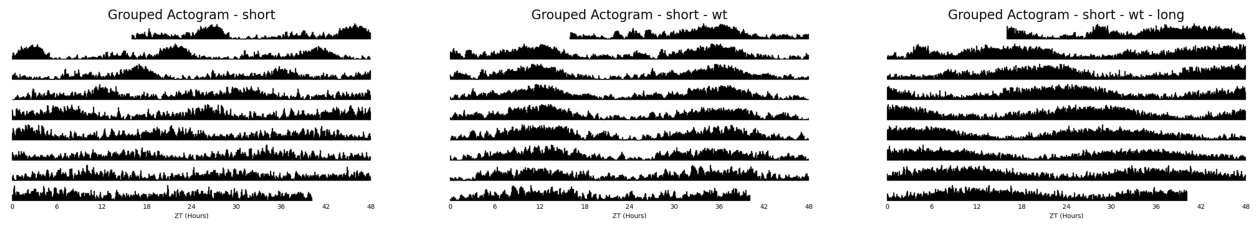

In [8]:
# Lets create an averaged Actogram for each period group using the .plot_actogram() method
# Choose the column with the movement data, the averaging window you'd like to use, and then the column to facet by
fig = df.plot_actogram(
        mov_variable = 'moving',
        bin_window = 5, # the default is 5, but feel free to change it to smooth out the plot or vice versa
        facet_col = 'period_group',
        facet_arg = ['short', 'wt', 'long'],
        title = 'Grouped Actogram')

# If you dont give an arugment to facet_col then a single actogram will be plotted that is an average of all your data

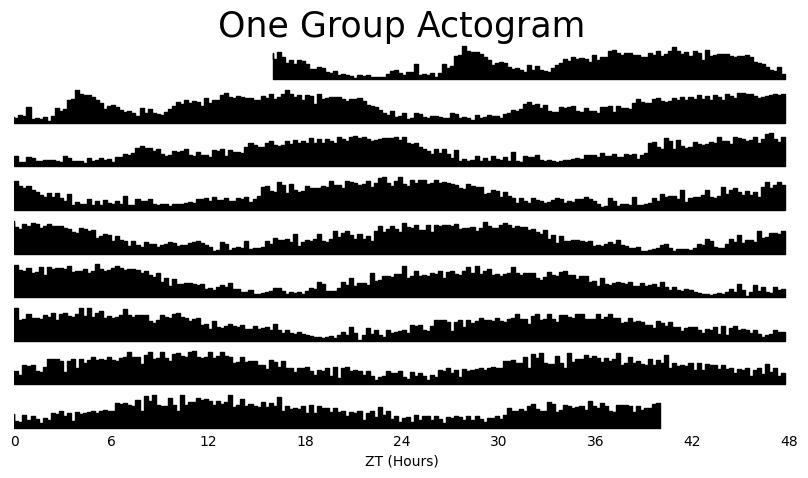

In [9]:
fig = df.xmv('period_group', 'long').plot_actogram(
        mov_variable = 'moving',
        bin_window = 15, # the default is 5, but feel free to change it to smooth out the plot or vice versa
        title = 'One Group Actogram'
)

### Tiled Actograms

In [10]:
# Although we can already see the differences between the groups, often when you don't already have a nicely curated dataset it's nice to see everything
# When plotting all specimens the default is to take the specimens IDs as each plots title. However, these names can be uniformative at first glance and we might want
# to replace them with more informative labels. Lets create some for this example

# Remember to access the metadata part of the dataframe just add .meta
# We can create a new column by combining two others. However, the regio_id is a integer and not a string, so we have to convert it first
df.meta['tile_labels'] = df.meta['period_group'] + '_' + df.meta['region_id'].apply(lambda l: str(l))

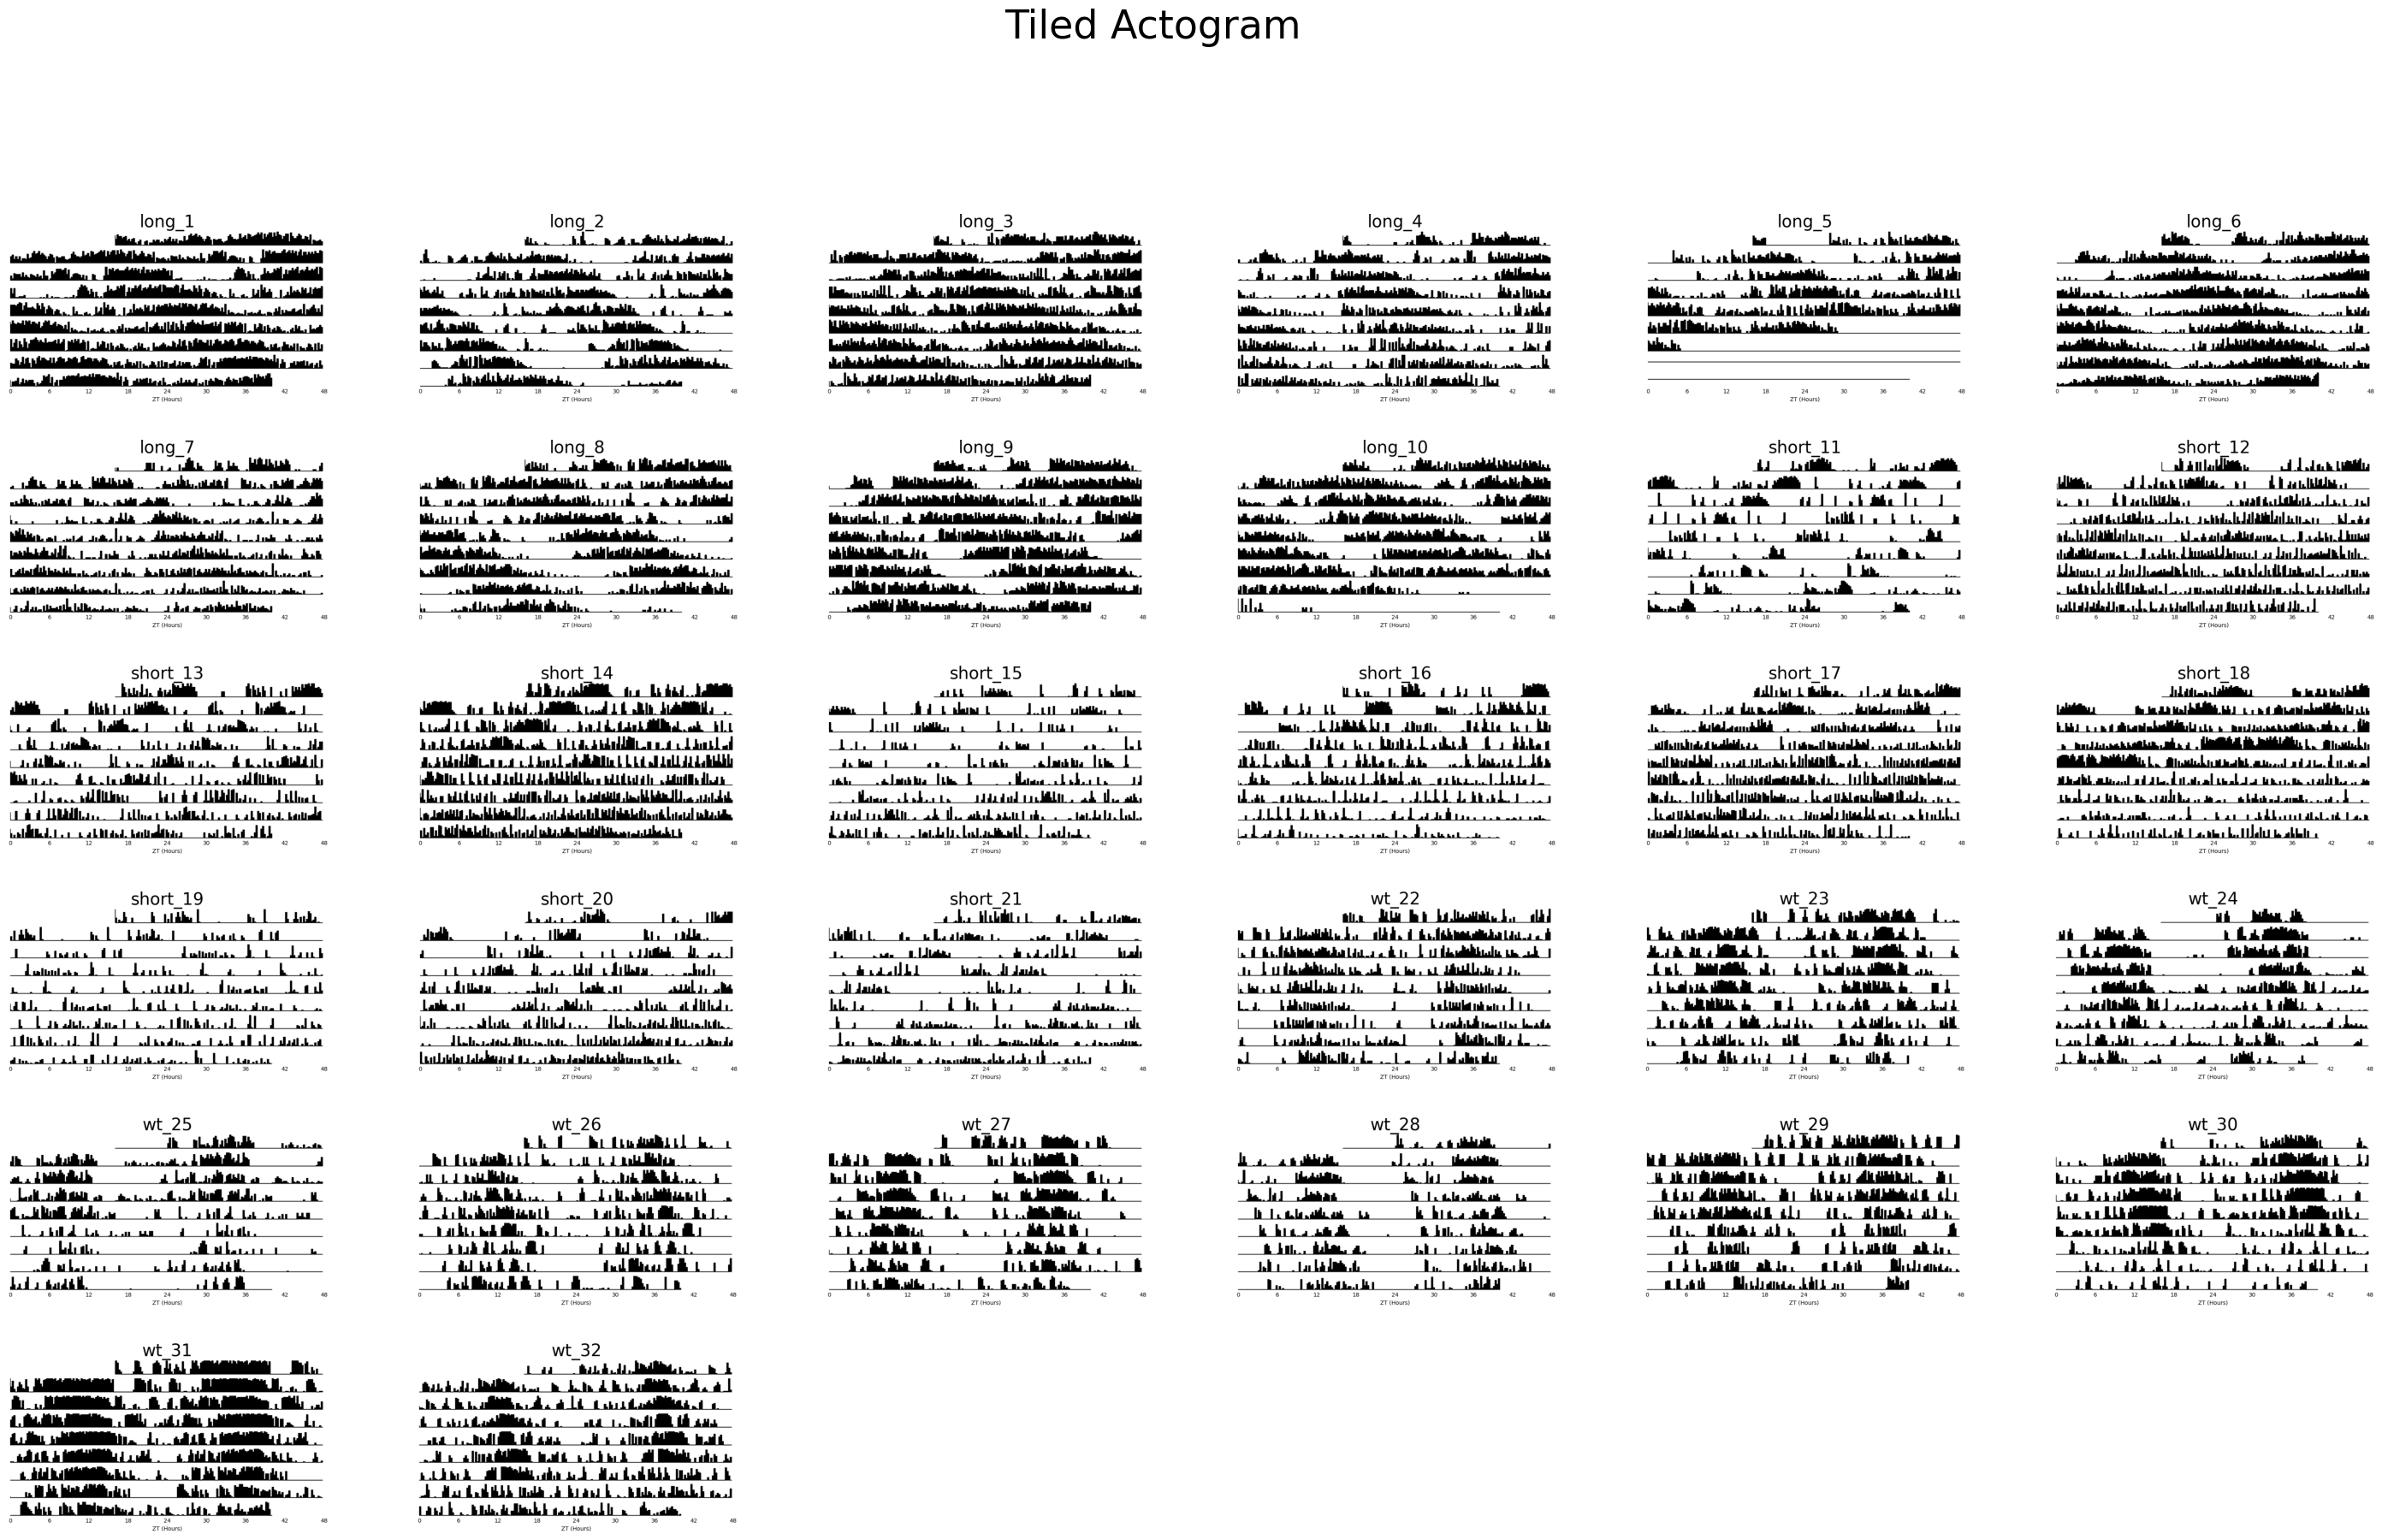

In [11]:
# plot_actogram_tile will plot every specimen in your behavpy dataframe
fig = df.plot_actogram_tile(
        mov_variable = 'moving',
        labels = 'tile_labels',
        title = 'Tiled Actogram')

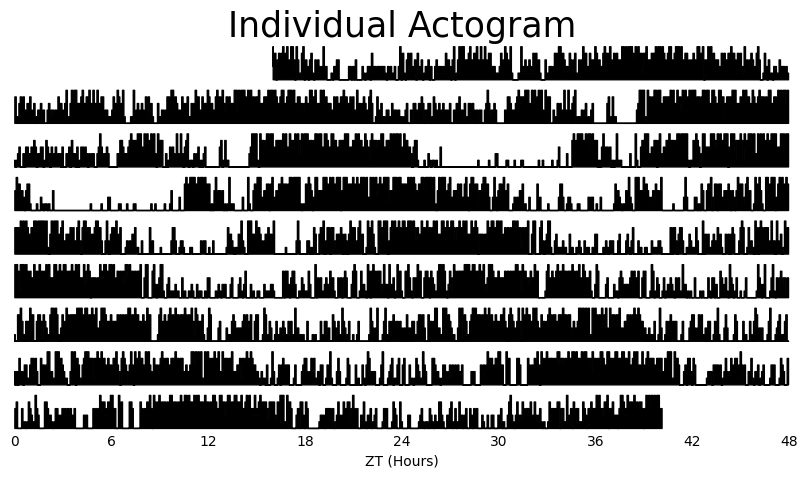

In [12]:
# If you just want to see produce a single actogram for one specimen then filter the dataframe before and then call .plot_actogram()
temp_df = df.xmv('id', '2017-01-16 08:00:00|circadian.txt|01')

fig = temp_df.plot_actogram(
        mov_variable = 'moving',
        title = 'Individual Actogram')

## 4. Anticipation Score

The anticipation score is the ratio of the final 3 hours of activity compared to the whole 6 hours of activity prior to lights on/off. This gives us a way of quantifying the morning and evening peaks of activity that are hallmarks of Drosophila circadian rythmn.

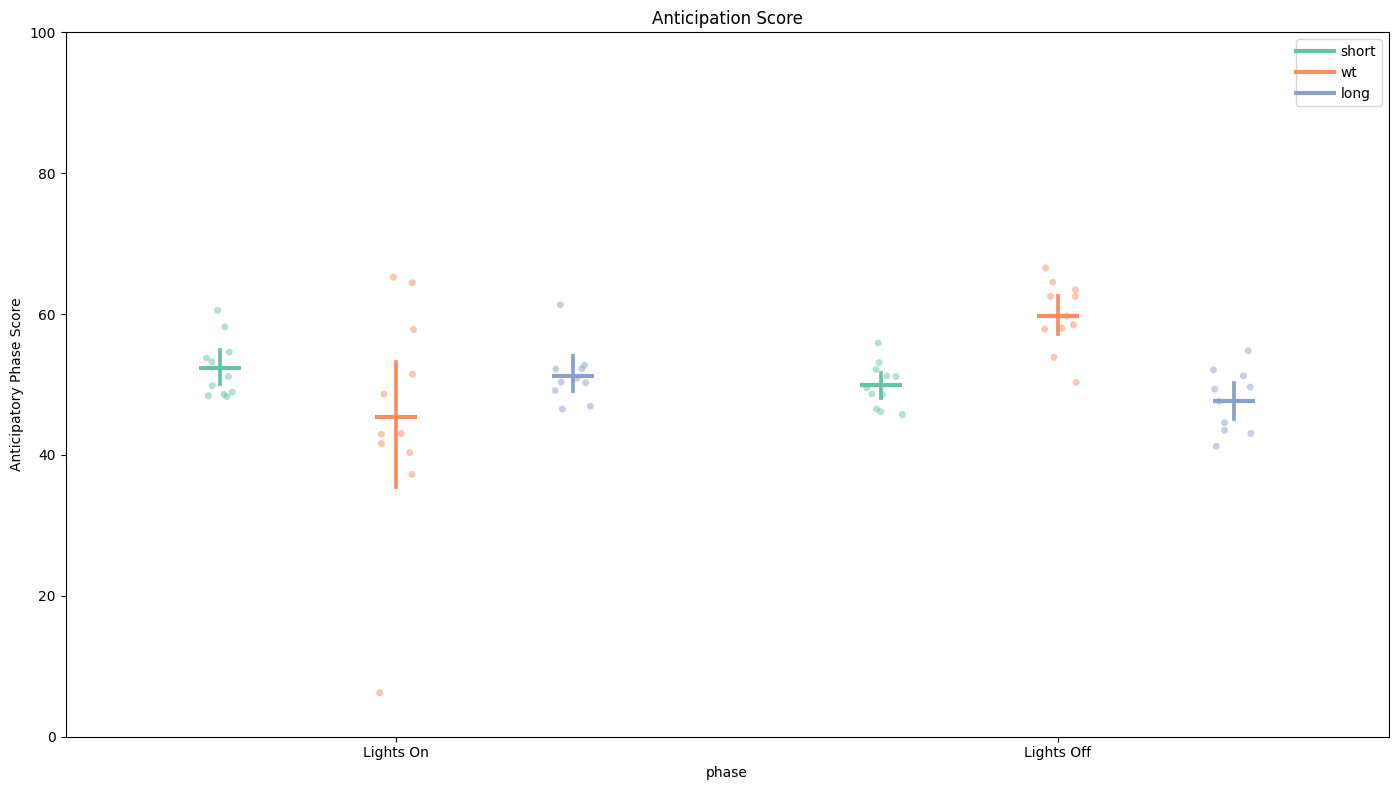

In [13]:
# Simply call the plot_anticipation_score() method to get a box plot of your results
# the day length and lights on/off time is 24 and 12 rarangeespectively, but these can be changed if you're augmenting the environment

fig, stats = df.plot_anticipation_score(
        variable = 'moving', 
        facet_col = 'period_group',
        facet_arg = ['short', 'wt', 'long'],
        day_length = 24,
        lights_off = 12,
        title = 'Anticipation Score')


# Here we can see only the WT flies have over 50% of their activity in the final 3 hours before lights off. This shows that they are anticipating the evening feeding time correctly,
# whereas the others fail to do so. Lights On score is the same across the groups.

## 4. Periodograms

Periodograms are essential for definitely showing periodicity in a quantifiable way. Periodograms often make use of algorithms created from spectral analysis, to decompose a signal into its component waves of varying frequencies. This has been adopted to behavioural data, in that it can find a base rythmn over several days from what is usually unclean data.

Ethoscopy has 5 types of periodograms built into its behavpy_periodogram class, which are 'chi squared' (the most commonly used), 'lomb scargle', fourier, and 'welch' (all based of of the fast fourier transformation (FFT) algorithm) and 'wavelet' (using FFT but maintaining the time dimension). 

Try them all out on your data and see which works best for you.

In [14]:
# Before we can access all the methods we first must compute our periodogram, so always call this method first
# For this example we'll compare the chi squared periodogram with lomb scargle
# the periodogram can only compute 4 types of periodograms currently, choose from this list ['chi_squared', 'lomb_scargle', 'fourier', 'welch']
per_chi = df.periodogram(
        mov_variable = 'moving',
        periodogram = 'chi_squared', 
        period_range = [10,32], # the range in time (hours) we think the circadian frequency lies, [10,32] is the default
        sampling_rate = 15, # the time in minutes you wish to smooth the data to. This method will interpolate missing results
        alpha = 0.01 # the cutoff value for significance, i.e. 1% confidence
)
per_lomb = df.periodogram(
        mov_variable = 'moving',
        periodogram = 'lomb_scargle', 
        period_range = [10,32],
        sampling_rate = 15,
        alpha = 0.01 
)
# Hint! Sometimes increasing the sampling_rate can improve you're periodograms. On average we found 15 to work best with our data, but it can be different for everyone.

In [15]:
# each periodogram should have atleast the columns period, power, and sig_threshold
per_chi

period       power  sig_threshold  \
id                                                                        
2017-01-16 08:00:00|circadian.txt|01    10.0   15.017724      84.865597   
2017-01-16 08:00:00|circadian.txt|01    10.1   15.017724      84.865597   
2017-01-16 08:00:00|circadian.txt|01    10.2   15.981930      86.297460   
2017-01-16 08:00:00|circadian.txt|01    10.3   15.981930      86.297460   
2017-01-16 08:00:00|circadian.txt|01    10.4   25.782411      87.724140   
...                                      ...         ...            ...   
2017-01-16 08:00:00|circadian.txt|32    31.6   90.517466     197.868285   
2017-01-16 08:00:00|circadian.txt|32    31.7  109.015424     199.113650   
2017-01-16 08:00:00|circadian.txt|32    31.8  109.015424     199.113650   
2017-01-16 08:00:00|circadian.txt|32    31.9  101.318872     200.358054   
2017-01-16 08:00:00|circadian.txt|32    32.0  101.318872     200.358054   

                                       p_value  
id                                              
2017-01-16 08:00:00|circadian.txt|01  0.999888  
2017-01-16 08:00:00|circadian.txt|01  0.999909  
2017-01-16 08:00:00|circadian.txt|01  0.999831  
2017-01-16 08:00:00|circadian.txt|01  0.999862  
2017-01-16 08:00:00|circadian.txt|01  0.974120  
...                                        ...  
2017-01-16 08:00:00|circadian.txt|32  0.993275  
2017-01-16 08:00:00|circadian.txt|32  0.871045  
2017-01-16 08:00:00|circadian.txt|32  0.876392  
2017-01-16 08:00:00|circadian.txt|32  0.958315  
2017-01-16 08:00:00|circadian.txt|32  0.960584  

[7072 rows x 4 columns]

In [16]:
# We can see that lomb_scargle has more rows that chi_squared. This is because the loomb scargle returns a list of freqeuncies between our period range that it determines best represents the
# data given. However, chi squared will just the binned windows we give it from the sampling_rate
# Lomb scargle has been reported to be more accurate with chi squared sometimes giving false positives, see: https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1008567
# However sometimes it's the only one that works, so try all of them
per_lomb

period     power  sig_threshold
id                                                                      
2017-01-16 08:00:00|circadian.txt|01  10.000000  0.001033       0.031101
2017-01-16 08:00:00|circadian.txt|01  10.023202  0.001504       0.031101
2017-01-16 08:00:00|circadian.txt|01  10.046512  0.002045       0.031101
2017-01-16 08:00:00|circadian.txt|01  10.069930  0.002629       0.031101
2017-01-16 08:00:00|circadian.txt|01  10.093458  0.003229       0.031101
...                                         ...       ...            ...
2017-01-16 08:00:00|circadian.txt|32  31.079137  0.000887       0.031101
2017-01-16 08:00:00|circadian.txt|32  31.304348  0.000930       0.031101
2017-01-16 08:00:00|circadian.txt|32  31.532847  0.001138       0.031101
2017-01-16 08:00:00|circadian.txt|32  31.764706  0.001520       0.031101
2017-01-16 08:00:00|circadian.txt|32  32.000000  0.002073       0.031101

[9536 rows x 3 columns]

### Plotting the Periodograms

#### Tiled Plots

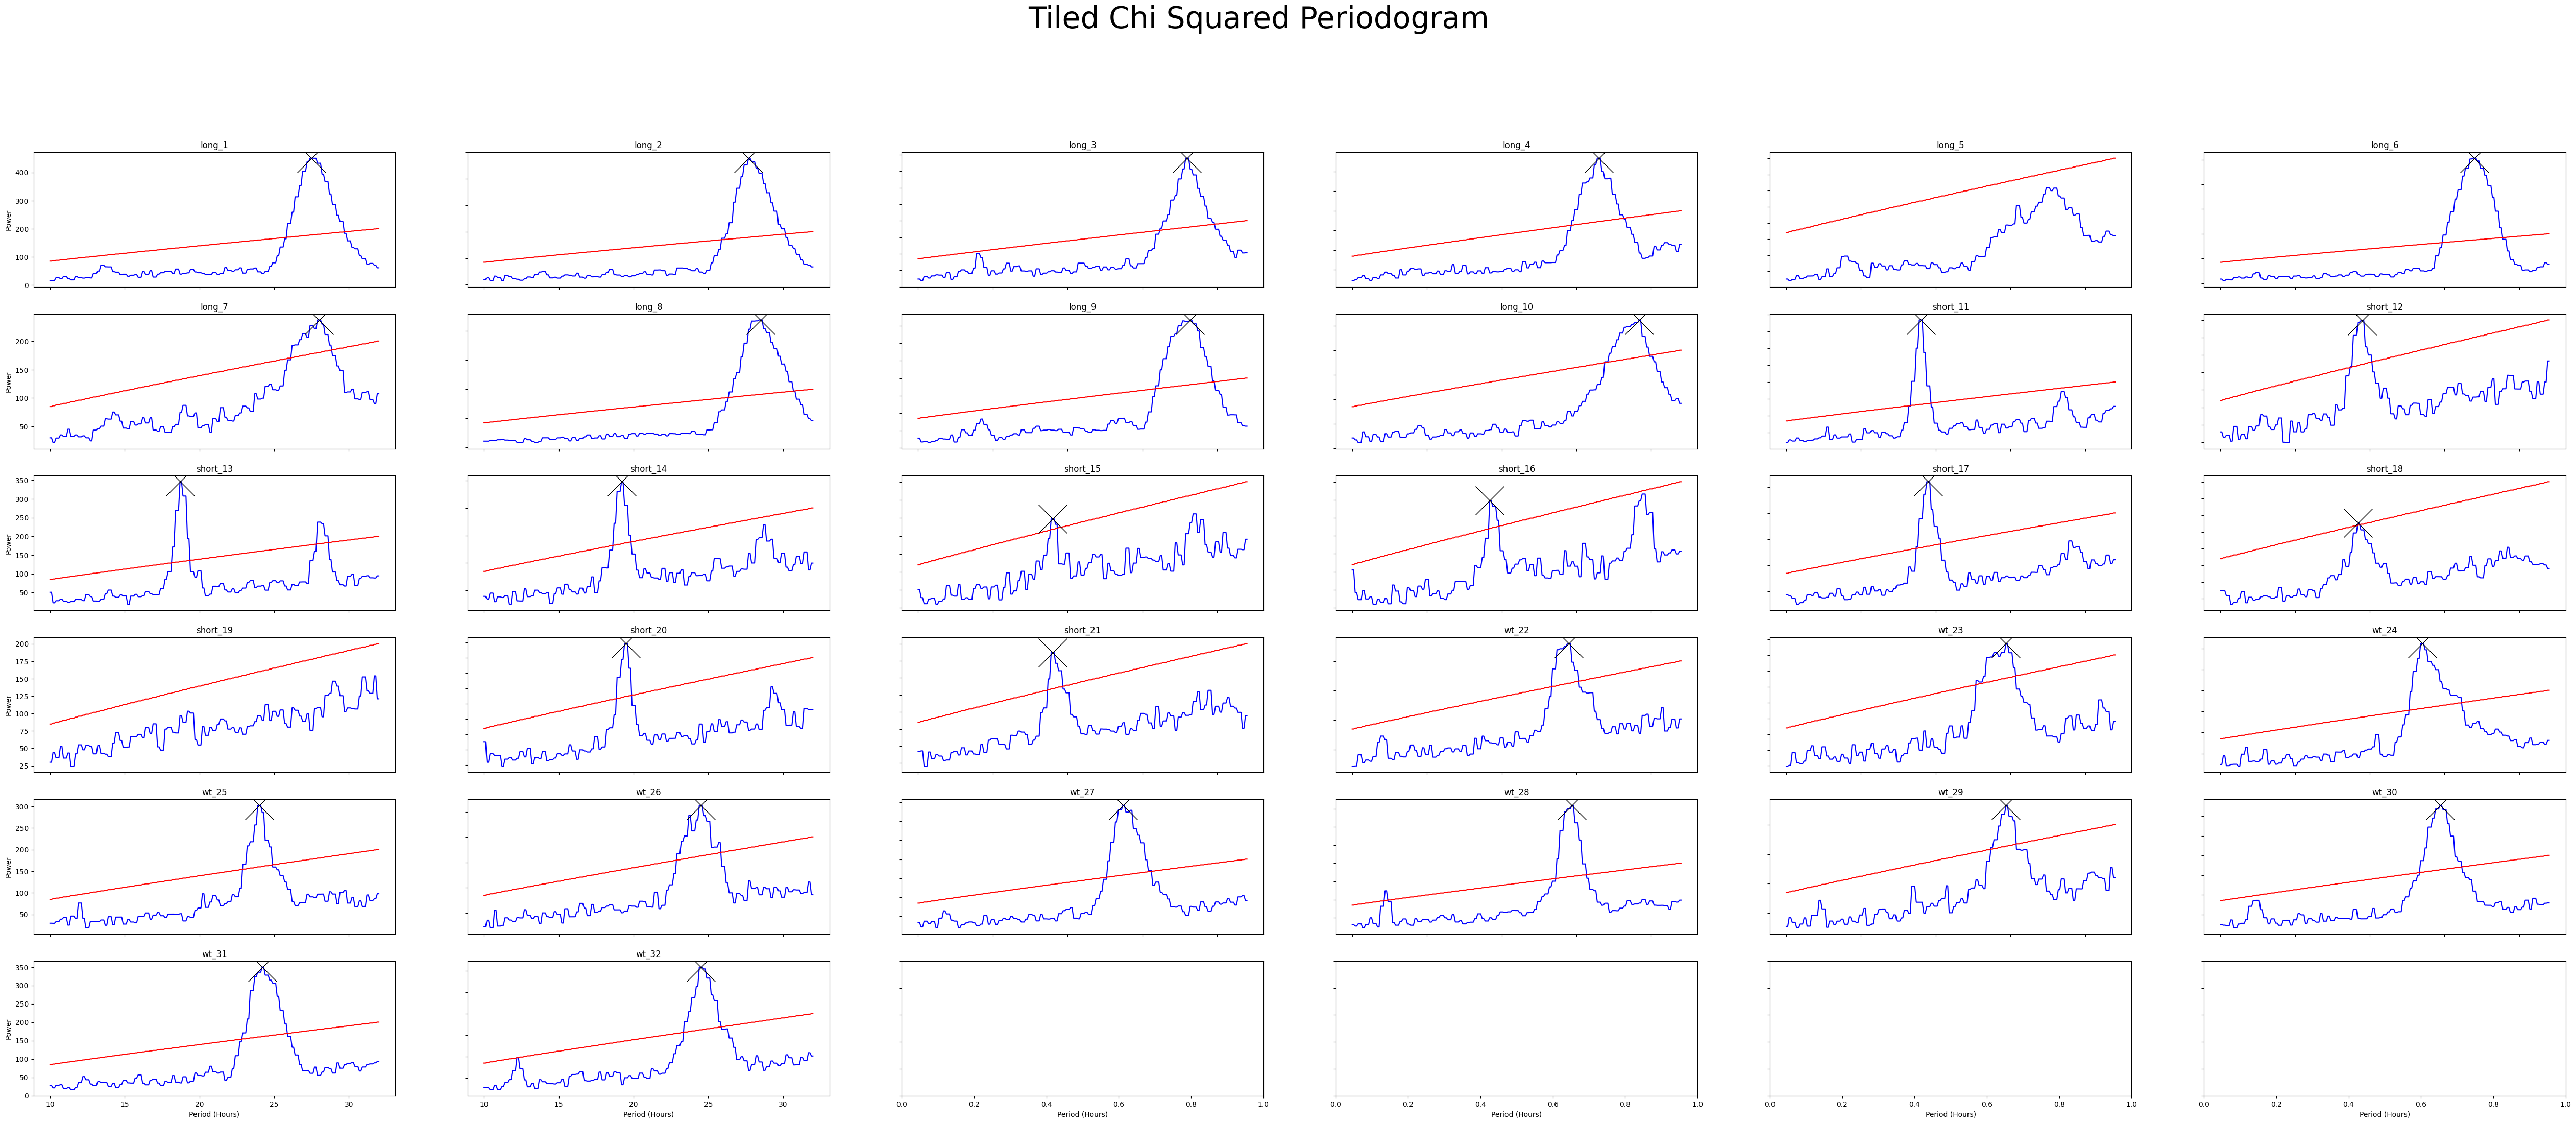

In [17]:
# To get a good understanding of each individual specimen you might want to plot the periodograms of each individual
# Like the actogram_tile method we can rely on the ids of each specimen or we can use the labels we created
fig = per_chi.plot_periodogram_tile(
            labels = 'tile_labels',
            find_peaks = True, # make find_peaks True to add a marker over significant peaks
            title = 'Tiled Chi Squared Periodogram'
)

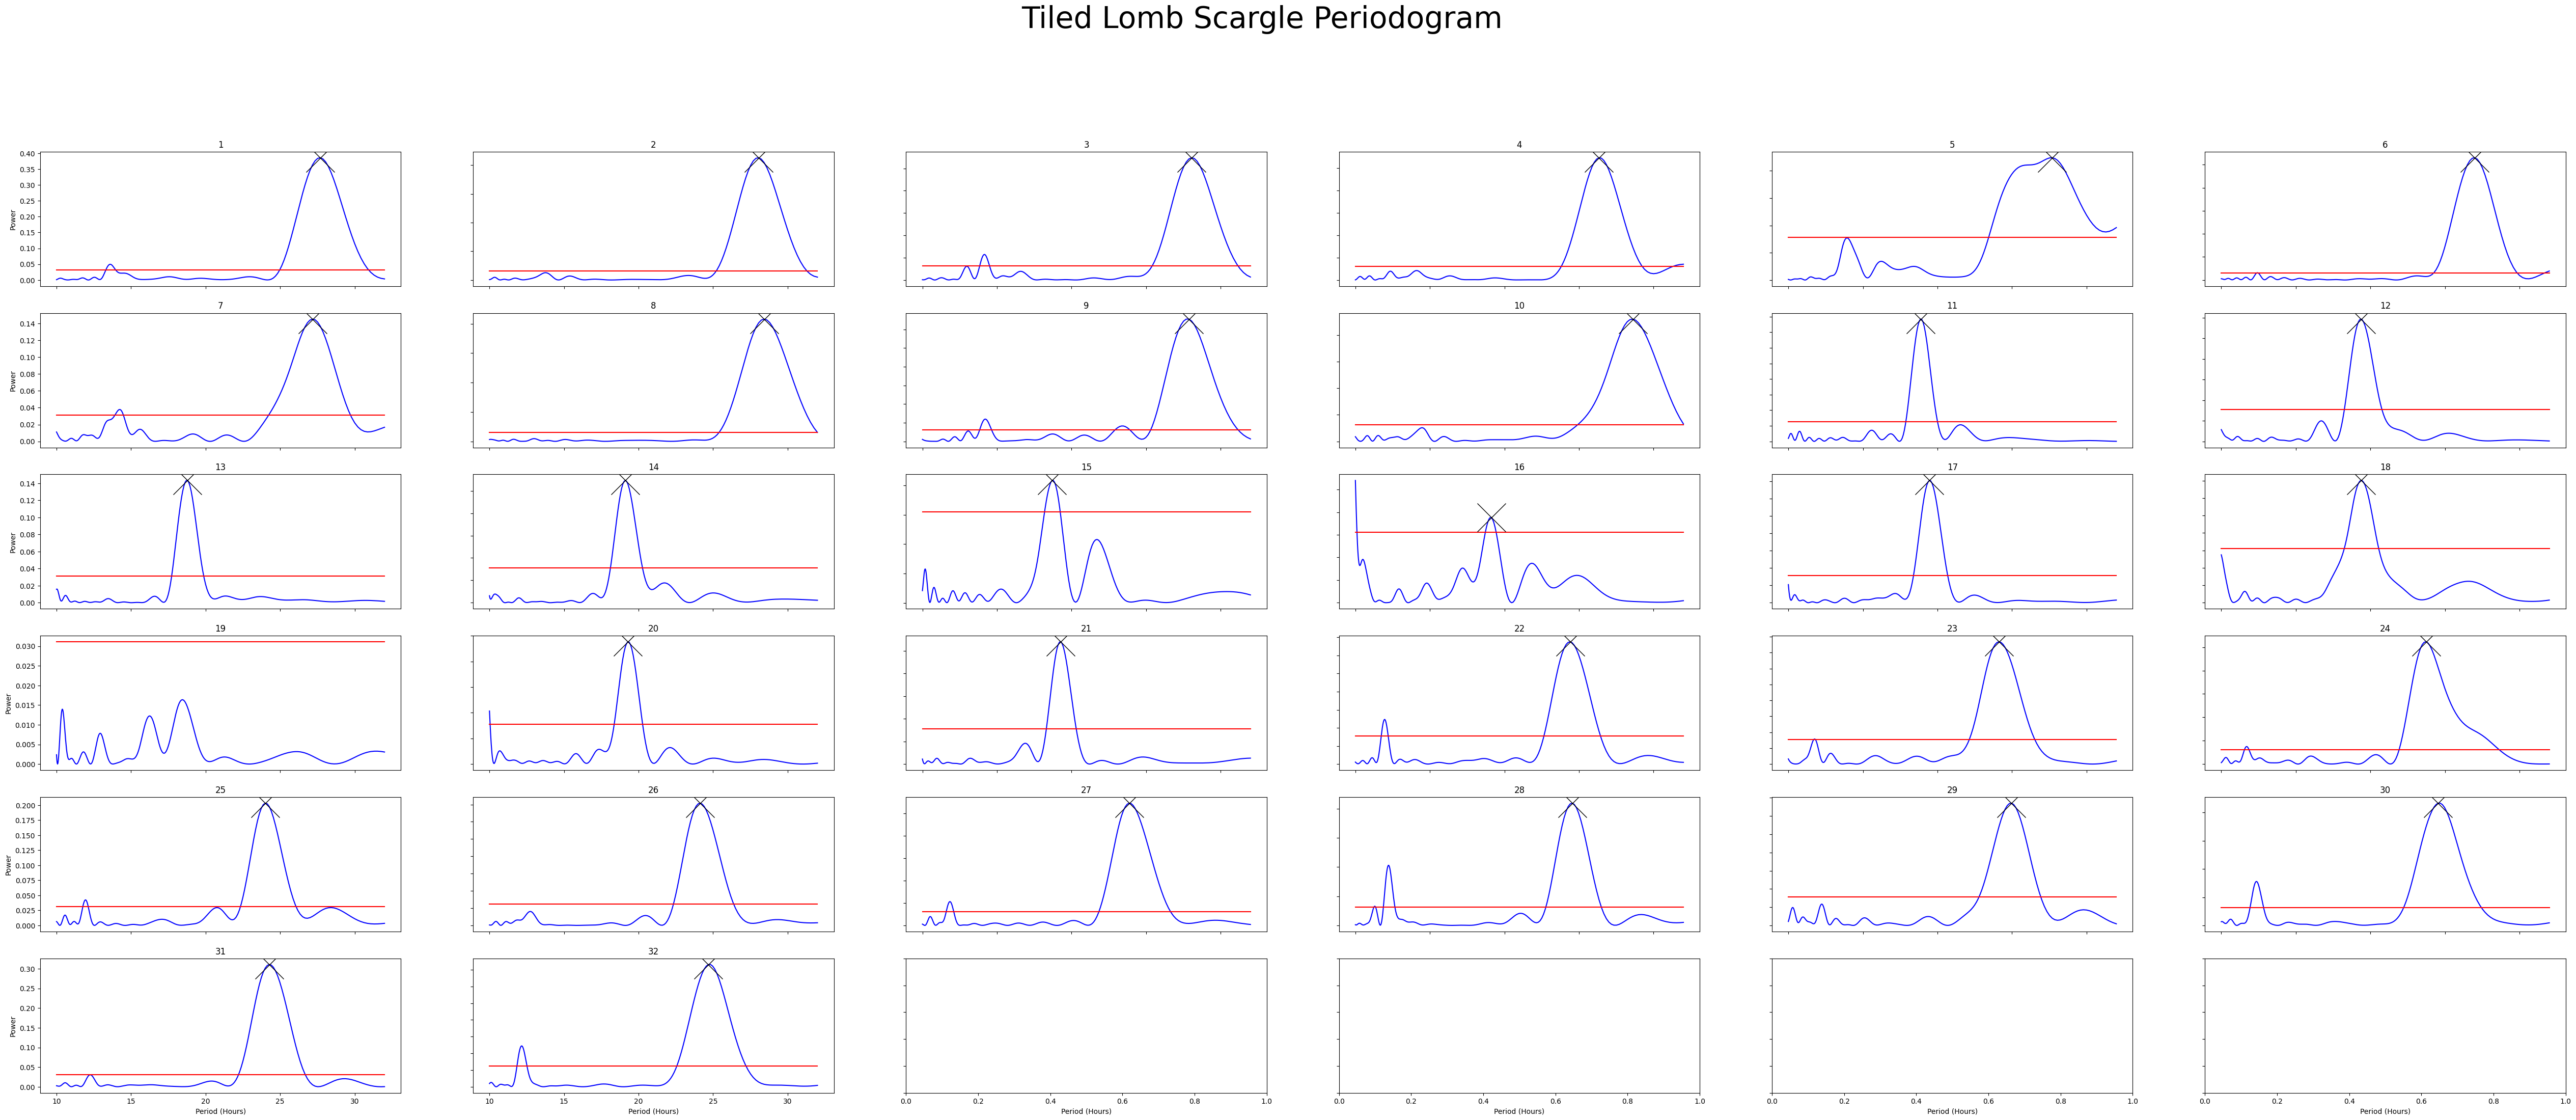

In [18]:
fig = per_lomb.plot_periodogram_tile(
            labels = 'region_id',
            find_peaks = True, # make find_peaks True to add a marker over significant peaks
            title = 'Tiled Lomb Scargle Periodogram'
)

#### Grouped Plots

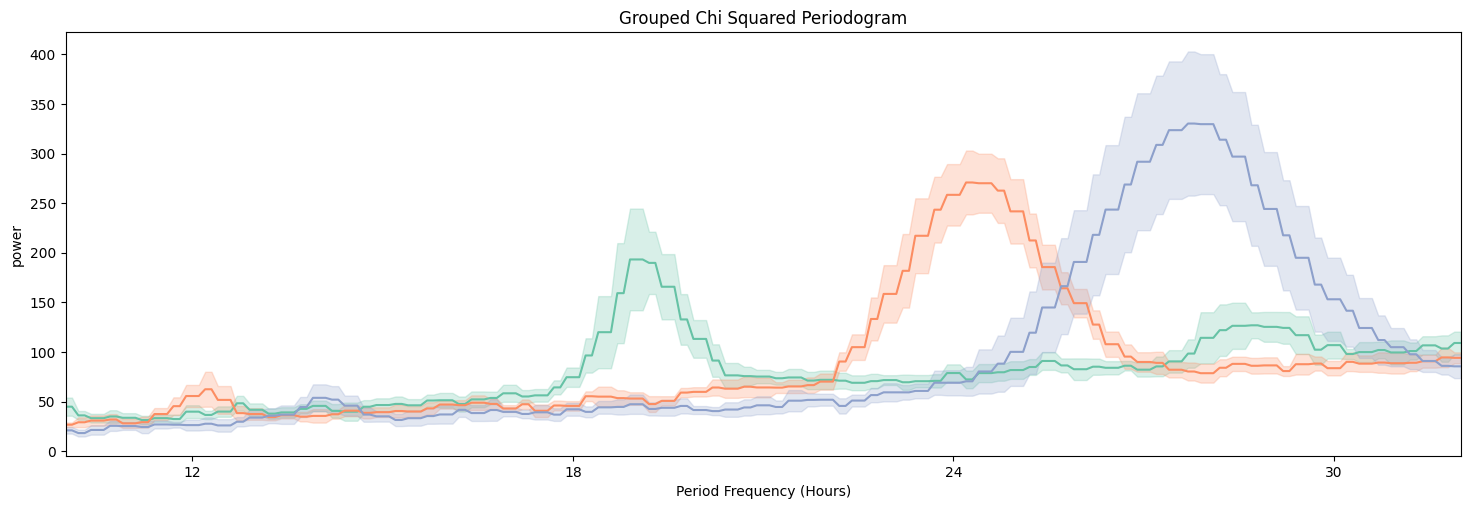

In [19]:
# Lets have a looked at them averaged across the groups
fig = per_chi.plot_periodogram(
            facet_col = 'period_group',
            facet_arg = ['short', 'wt', 'long'],
            title = 'Grouped Chi Squared Periodogram'
)

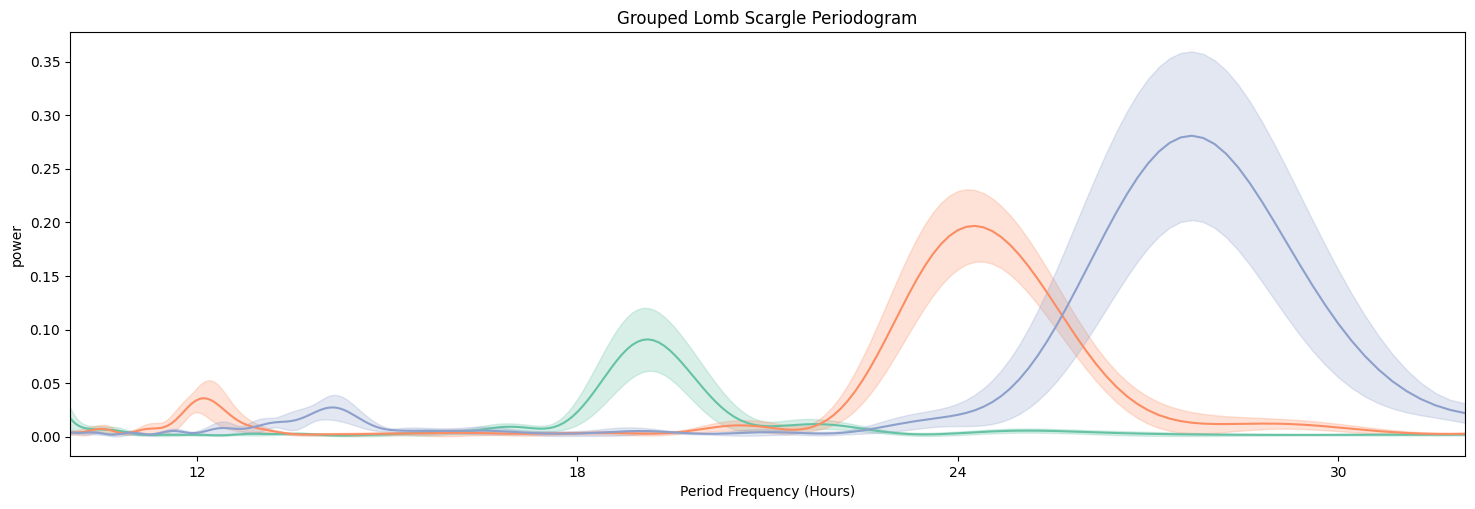

In [20]:
fig = per_lomb.plot_periodogram(
            facet_col = 'period_group',
            facet_arg = ['short', 'wt', 'long'],
            title = 'Grouped Lomb Scargle Periodogram'
)

We can see from both Chi Squared and Lomb Scargle that the different groups have periodicities of about 19, 24, and 27 respectively. But now we want to quantify this.

#### Quantify Periodogram

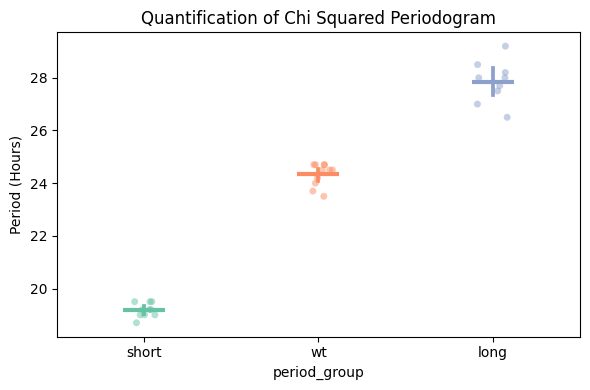

In [21]:
# Quantify the periodograms by finding the highest power peak and comparing it across specimens in a group
# call .quantify_periodogram() to get the results
fig, stats = per_chi.plot_periodogram_quantify(
        facet_col = 'period_group',
        facet_arg = ['short', 'wt', 'long'],
        title = 'Quantification of Chi Squared Periodogram'
)

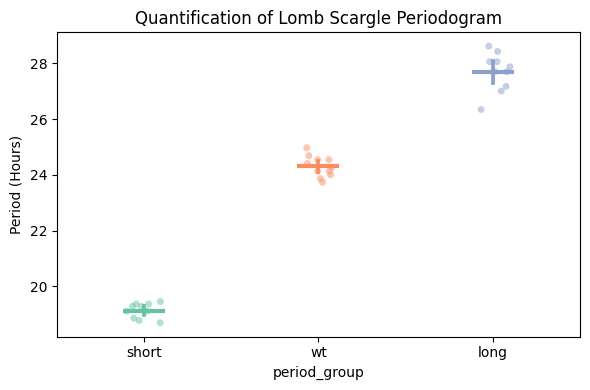

In [22]:
fig, stats = per_lomb.plot_periodogram_quantify(
        facet_col = 'period_group',
        facet_arg = ['short', 'wt', 'long'],
        title = 'Quantification of Lomb Scargle Periodogram'
)

In [23]:
# You can find the peaks in your periodograms without plotting, use .find_peaks()
# Find peaks adds a column to your periodogram dataframe with the rank of your peak. I.e. false = no peak, 2 = 2nd highest peak, 1 = highest peak
per_chi_peaks = per_chi.find_peaks(
            num_peaks = 3 # maximum number of peaks you want returned, if there are less than your given number then only they will be returned
)
#Lets have a look at the peaks
per_chi_peaks[per_chi_peaks['peak'] != False]

period       power  sig_threshold  \
id                                                                        
2017-01-16 08:00:00|circadian.txt|01    27.5  450.813427     177.801895   
2017-01-16 08:00:00|circadian.txt|02    27.7  477.391271     179.064334   
2017-01-16 08:00:00|circadian.txt|03    28.0  389.438169     180.325601   
2017-01-16 08:00:00|circadian.txt|04    26.5  333.986303     172.740077   
2017-01-16 08:00:00|circadian.txt|04    27.2  283.069753     176.538266   
2017-01-16 08:00:00|circadian.txt|06    27.0  506.176375     175.273431   
2017-01-16 08:00:00|circadian.txt|07    27.0  213.145271     175.273431   
2017-01-16 08:00:00|circadian.txt|07    27.5  227.570282     177.801895   
2017-01-16 08:00:00|circadian.txt|07    28.0  237.543770     180.325601   
2017-01-16 08:00:00|circadian.txt|08    28.5  438.103691     182.844675   
2017-01-16 08:00:00|circadian.txt|09    27.7  364.621489     179.064334   
2017-01-16 08:00:00|circadian.txt|09    28.2  367.268104     181.585709   
2017-01-16 08:00:00|circadian.txt|10    29.2  262.092251     186.614866   
2017-01-16 08:00:00|circadian.txt|11    19.0  384.451684     134.039537   
2017-01-16 08:00:00|circadian.txt|12    19.5  199.271447     136.667642   
2017-01-16 08:00:00|circadian.txt|13    18.7  345.971051     132.722406   
2017-01-16 08:00:00|circadian.txt|13    28.0  238.148852     180.325601   
2017-01-16 08:00:00|circadian.txt|14    19.2  248.128301     135.354602   
2017-01-16 08:00:00|circadian.txt|15    19.0  148.744106     134.039537   
2017-01-16 08:00:00|circadian.txt|16    19.2  174.030394     135.354602   
2017-01-16 08:00:00|circadian.txt|17    19.5  260.005546     136.667642   
2017-01-16 08:00:00|circadian.txt|18    19.2  138.525514     135.354602   
2017-01-16 08:00:00|circadian.txt|20    19.5  223.094622     136.667642   
2017-01-16 08:00:00|circadian.txt|21    19.0  187.141131     134.039537   
2017-01-16 08:00:00|circadian.txt|22    24.5  229.875173     162.554892   
2017-01-16 08:00:00|circadian.txt|23    22.7  160.132105     153.568905   
2017-01-16 08:00:00|circadian.txt|23    24.0  204.326275     159.994872   
2017-01-16 08:00:00|circadian.txt|23    24.7  218.376481     163.832772   
2017-01-16 08:00:00|circadian.txt|24    23.5  311.430224     157.429022   
2017-01-16 08:00:00|circadian.txt|24    25.7  188.288242     168.930574   
2017-01-16 08:00:00|circadian.txt|25    24.0  302.302465     159.994872   
2017-01-16 08:00:00|circadian.txt|26    23.7  242.571969     158.712687   
2017-01-16 08:00:00|circadian.txt|26    24.5  262.744910     162.554892   
2017-01-16 08:00:00|circadian.txt|26    25.7  189.030126     168.930574   
2017-01-16 08:00:00|circadian.txt|27    23.7  341.685413     158.712687   
2017-01-16 08:00:00|circadian.txt|27    24.2  328.612486     161.275600   
2017-01-16 08:00:00|circadian.txt|28    12.2  124.096830      97.579901   
2017-01-16 08:00:00|circadian.txt|28    24.7  359.254535     163.832772   
2017-01-16 08:00:00|circadian.txt|29    24.7  232.837984     163.832772   
2017-01-16 08:00:00|circadian.txt|30    24.7  327.653915     163.832772   
2017-01-16 08:00:00|circadian.txt|31    24.2  350.007707     161.275600   
2017-01-16 08:00:00|circadian.txt|32    12.2   98.003214      97.579901   
2017-01-16 08:00:00|circadian.txt|32    24.5  309.237759     162.554892   

                                           p_value peak  
id                                                       
2017-01-16 08:00:00|circadian.txt|01  0.000000e+00    1  
2017-01-16 08:00:00|circadian.txt|02  0.000000e+00    1  
2017-01-16 08:00:00|circadian.txt|03  0.000000e+00    1  
2017-01-16 08:00:00|circadian.txt|04  0.000000e+00    1  
2017-01-16 08:00:00|circadian.txt|04  0.000000e+00    2  
2017-01-16 08:00:00|circadian.txt|06  0.000000e+00    1  
2017-01-16 08:00:00|circadian.txt|07  6.944800e-09    3  
2017-01-16 08:00:00|circadian.txt|07  3.329589e-10    2  
2017-01-16 08:00:00|circadian.txt|07  4.876988e-11    1  
2017-01-16 08:00:00|circ

### Wavelets

The final periodogram is wavelets, which preserve the time dimension when finding the underlying frequencies. This means you can see how periodcity changes over the course of a long experiment

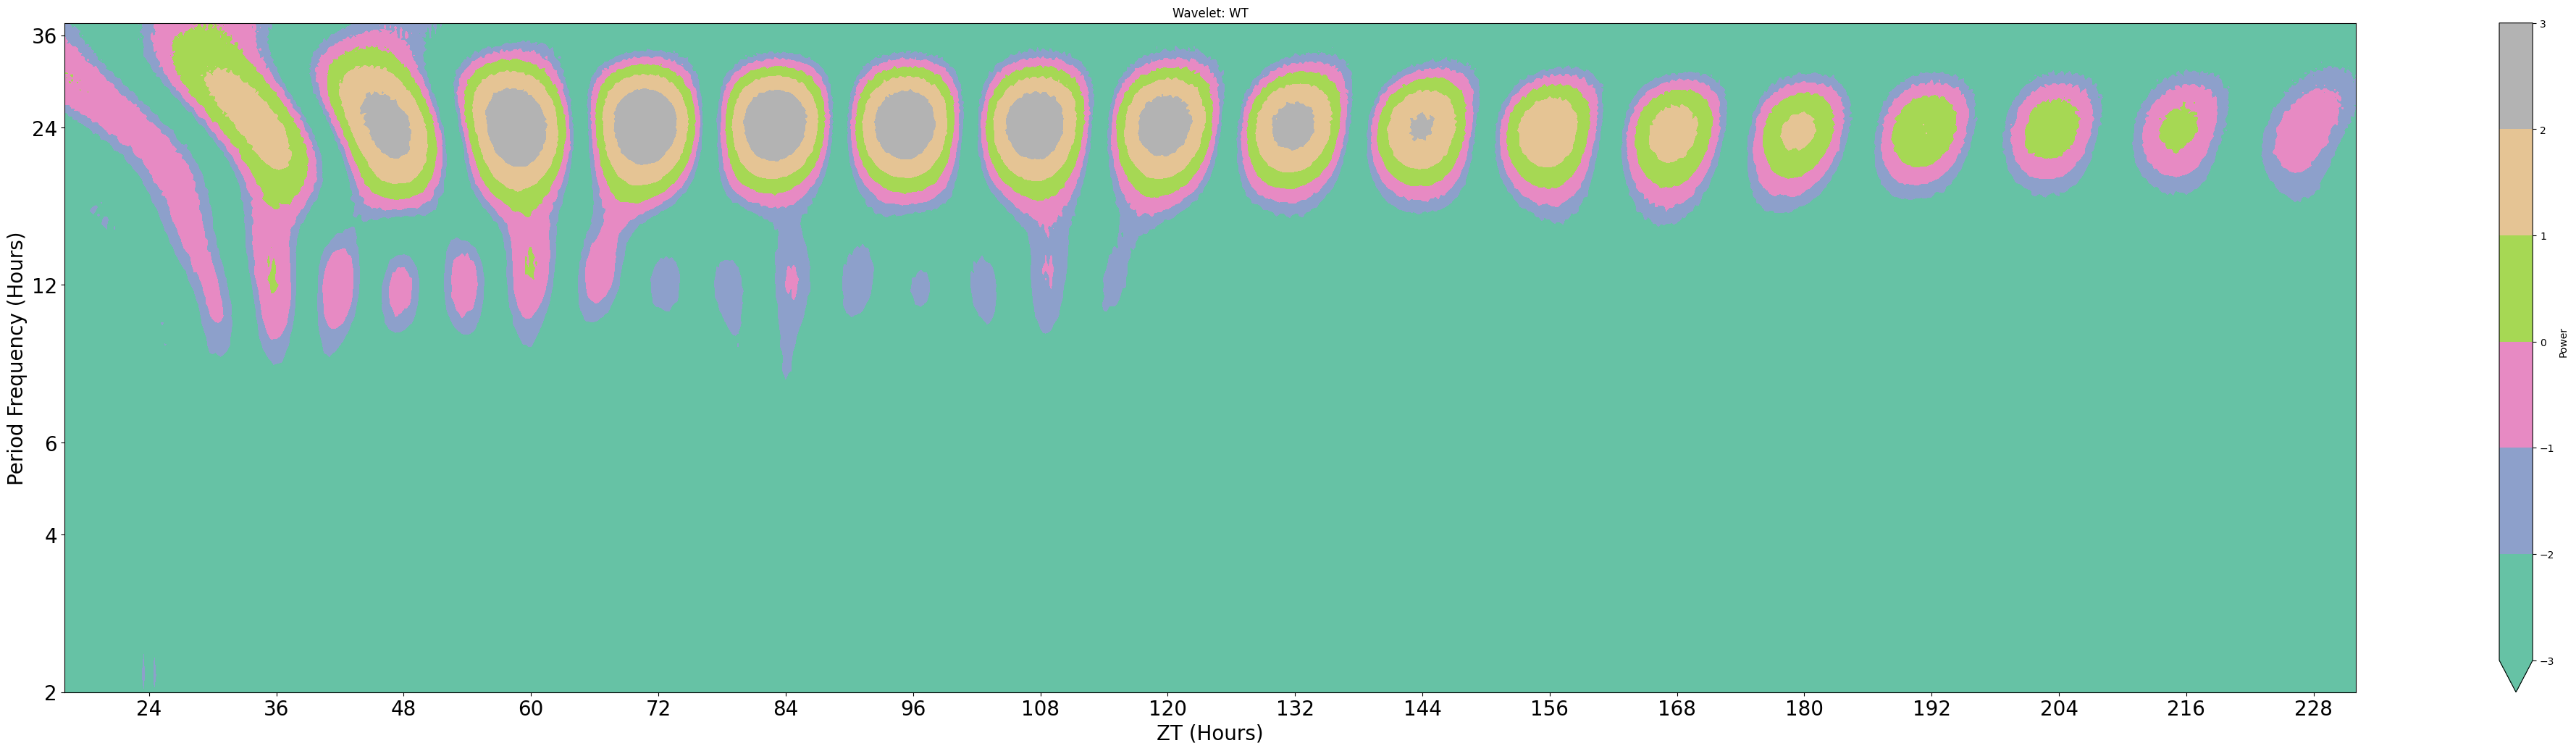

In [24]:
# Wavelet plots are intensive to plot usually due to the amount of points. Therefore the .wavelet function will compute and plot just one wavelet transformation, averaging all the data in your dataframe
# It's therefore recommended you filter prior to calling the function, either by groups or to individual specimens
# This method is powered bythe python package pywt, Head to https://pywavelets.readthedocs.io/en/latest/ for information about the pacakage and the other wavelet types
wt_df = df.xmv('period_group', 'wt')
fig = wt_df.plot_wavelet(
        mov_variable = 'moving',
        sampling_rate = 15, # increasing the sampling rate will increase the resolution of lower frequencues (16-30 hours), but lose resolution of higher frequencies (2-8 hours)
        scale = 156, # the defualt is 156, increasing this number will increase the resolution of lower frequencies (and lower the high frequencies), but it will take longer to compute
        wavelet_type = 'morl', # the default wavelet type and the most commonly used in circadian analysis. Head to the website above for the other wavelet types or call the method .wavelet_types() to see their names
        title = 'Wavelet: WT'

)

Areas of organge/red have high scores for the freqencies on the y-axis. Due to trying to fit all of the frequencies of the y-axis in the results are plotted on a natural log scale, this makes it hard to find accurate changes in periodicity. However we can see how it changes over time, which here seems to decrease slightly. (The edge cases of wavelets tend to have the lowest scores due to the effect of windowing, so the drop is not unexpected)

Here we've walked you through how to use behavpy to perform circadian analysis on your data, go forth and analyse